In [1]:

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [2]:
data=np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded,Play_encoded])
data = np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded])
column_name = ['Outlook','Temperature','Humidity','Wind']
data_frm = pd.DataFrame(data=data,columns=column_name)
data_frm

,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [3]:
from sklearn.model_selection import train_test_split
x=data
y=Play_encoded
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05,random_state=1)
x_test

array([[2, 2, 0, 0]])

In [5]:
from sklearn import metrics
clf=DecisionTreeClassifier(max_leaf_nodes=142,random_state=25)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#3(3) Plot the decision tree generated by the model for weather dataset. What were the values of criterion, max_depth during model generation.
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))


accuracy score:  0.0


In [6]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[0, 0],
       [1, 0]])

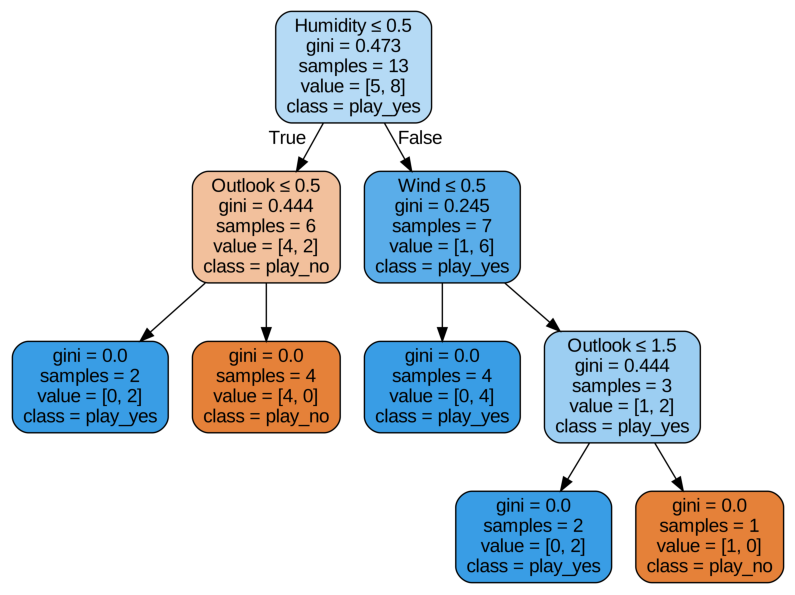

In [7]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=column_name,
                class_names=['play_no','play_yes'])

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [8]:
## 1What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
"""Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}"""
clf.predict([[1,2,1,0]])

array([1])

In [9]:
#2What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?
clf.predict([[2,0,0,1]])

array([0])

In [10]:
#(6) Train weather dataset using Decision Tree Classifier with max_depth of the tree =2. Find out accuracy, precision and recall of the trained model.
from sklearn import metrics
clf=DecisionTreeClassifier(max_depth=2,random_state=25)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [11]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.0


In [12]:
#7Implement the Decision Tree classifier on Iris dataset and find the ccp_alpha values associated with the decision tree generated.
from sklearn import datasets
import pandas  as pd

In [13]:
df=datasets.load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
x=df.feature_names
x

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
y=df.target_names
y
x=df.data
y=df.target

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)





In [18]:
from sklearn import  metrics
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [19]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.9733333333333334


In [20]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[24,  0,  0],
       [ 0, 23,  1],
       [ 0,  1, 26]])

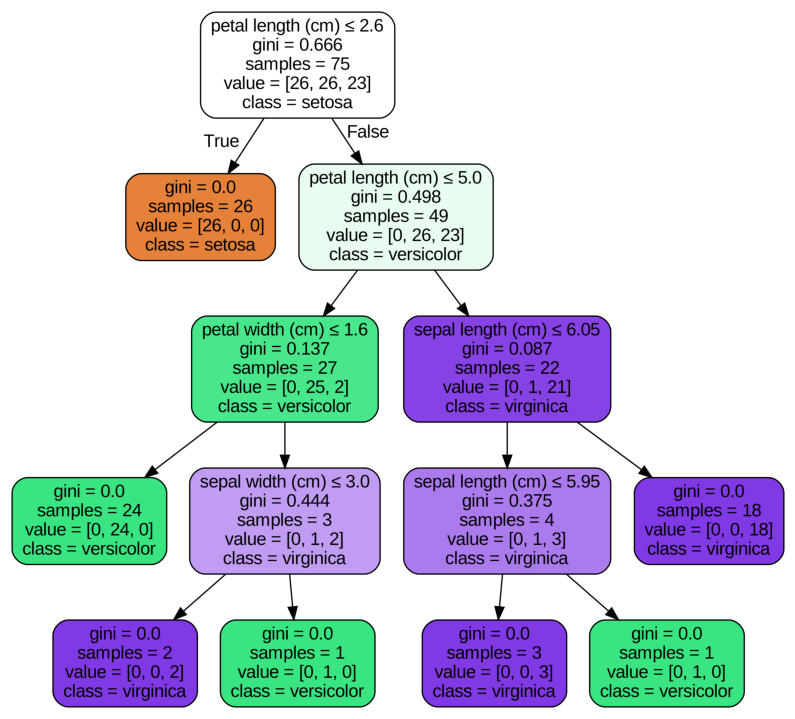

In [21]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)
from sklearn import metrics
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.9066666666666666


In [23]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  7, 20]])

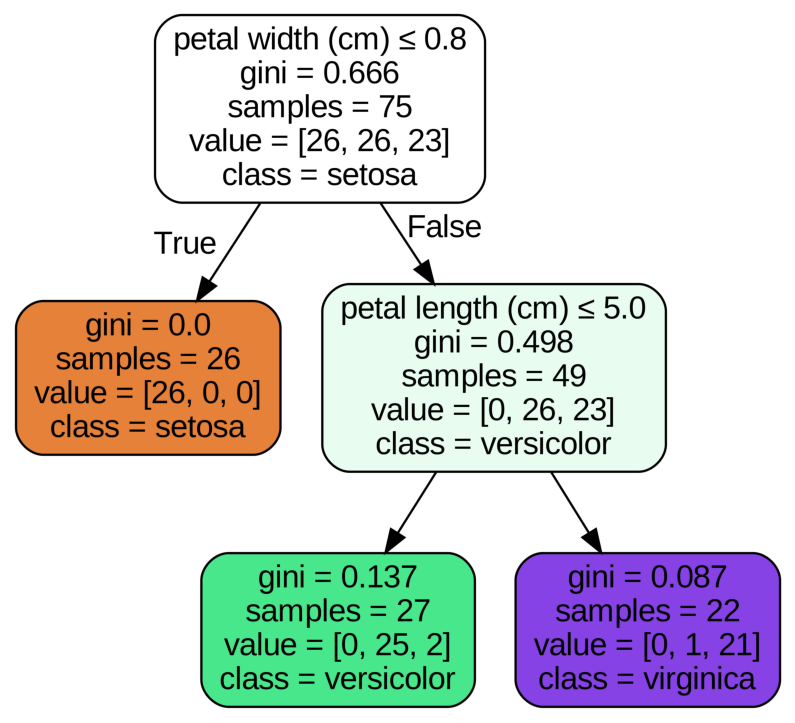

In [24]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [26]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [28]:
ccp_alphas

array([0.        , 0.00869963, 0.01339286, 0.03571429, 0.26539835,
       0.33279549])

In [29]:
clfs = []
acc=[]
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   y_pred=clf.predict(X_test)
   acc1=metrics.accuracy_score(y_test,y_pred)
   acc.append(acc1)
   clfs.append(clf)
print(
"Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]
)
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.332795493197279


In [30]:
print(acc)
print(clfs)  

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.8947368421052632, 0.5789473684210527, 0.23684210526315788]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.008699633699633693, random_state=0), DecisionTreeClassifier(ccp_alpha=0.013392857142857142, random_state=0), DecisionTreeClassifier(ccp_alpha=0.03571428571428571, random_state=0), DecisionTreeClassifier(ccp_alpha=0.2653983516483516, random_state=0), DecisionTreeClassifier(ccp_alpha=0.332795493197279, random_state=0)]


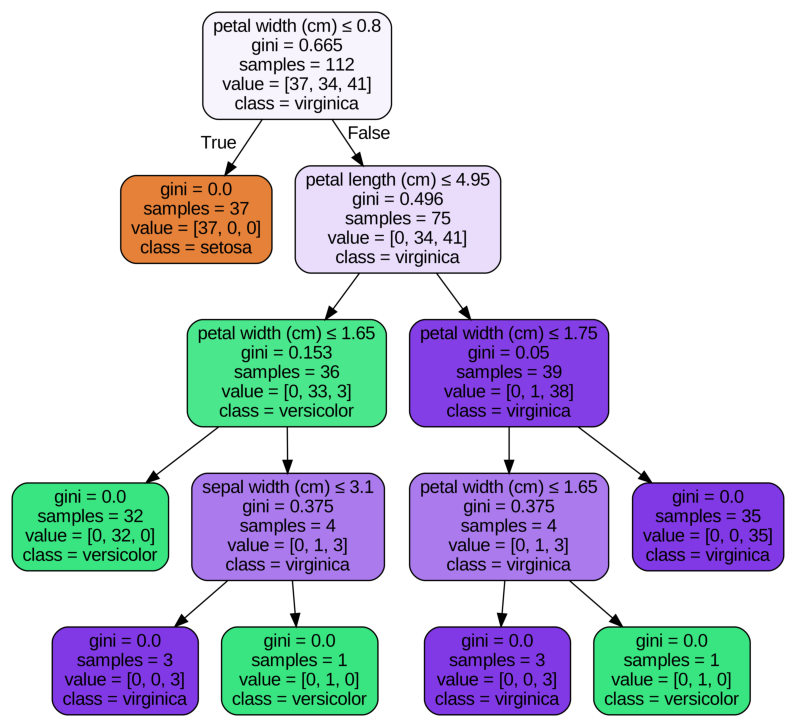

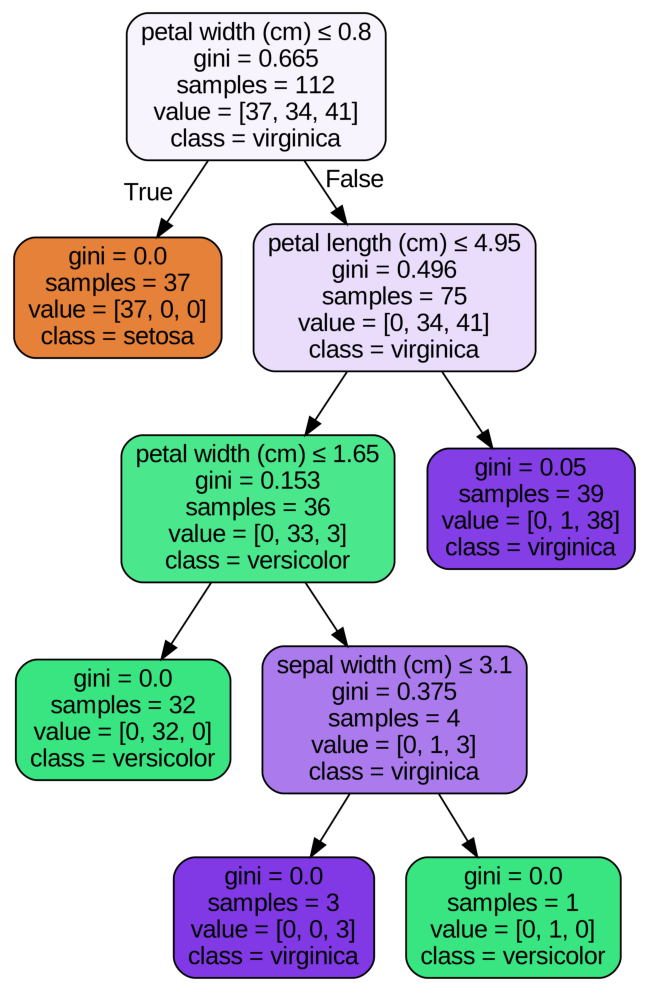

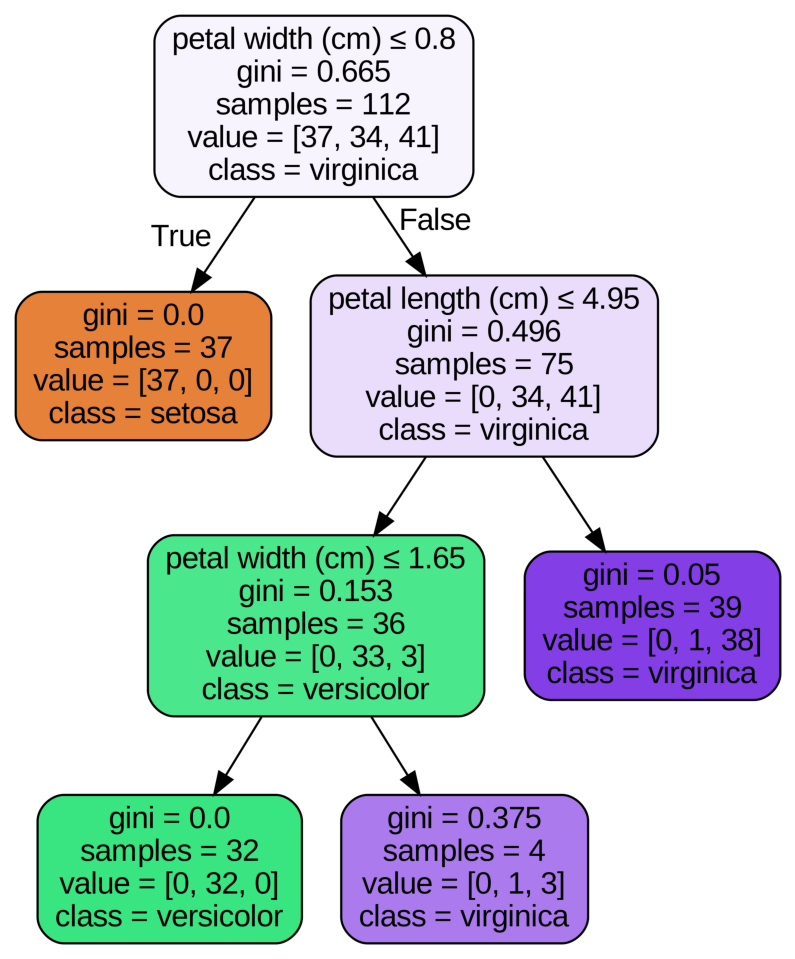

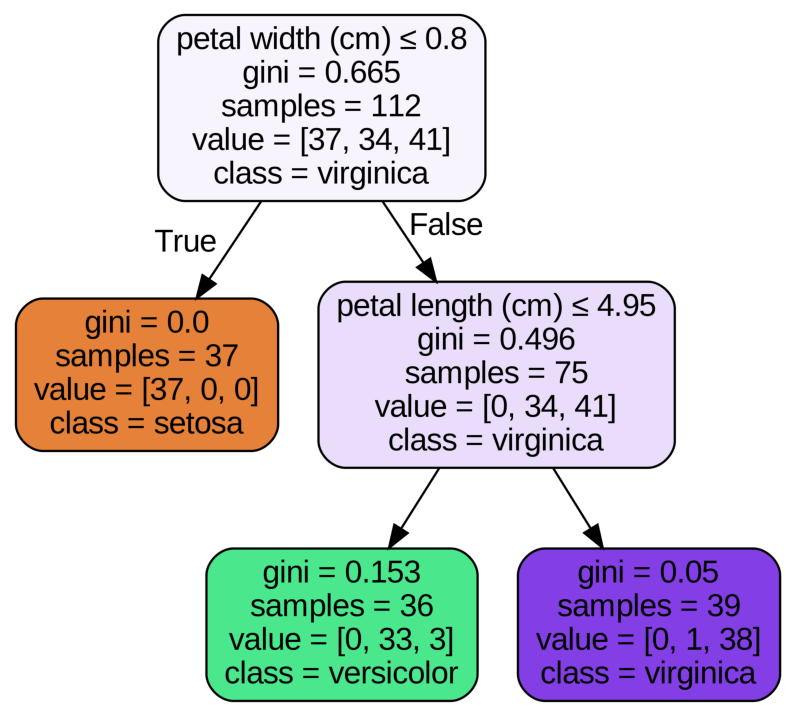

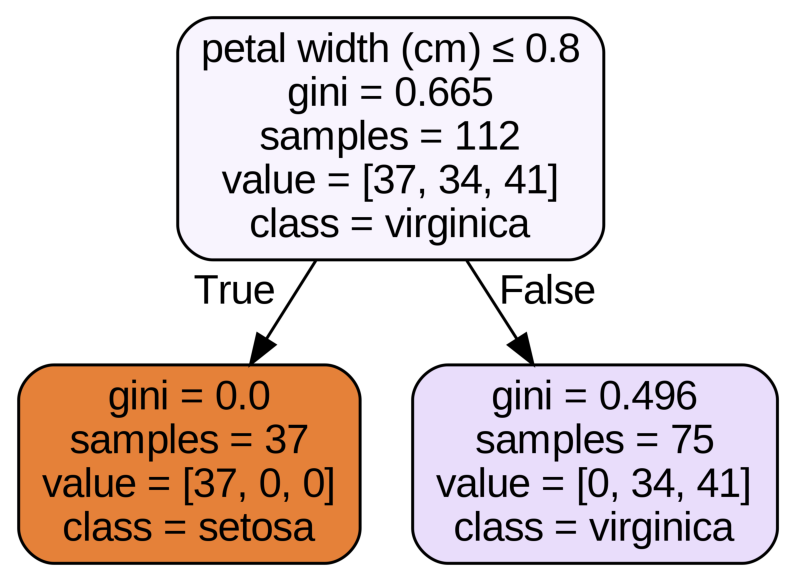

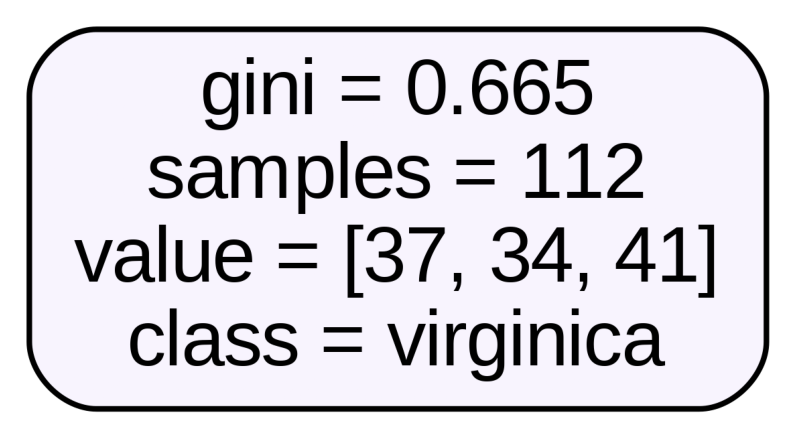

In [31]:
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt
for clf in clfs:
  export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
  call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python

  plt.figure(figsize = (14, 18))
  plt.imshow(plt.imread('tree_entropy.png'))
  plt.axis('off');
  plt.show();

In [32]:
##Apply algorithm on wine dataset - LabelEncoding of features: and Train test
#Division 66%-34%
from sklearn import datasets
import pandas  as pd

In [33]:
df=datasets.load_wine()
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [34]:
x=df.feature_names
x

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [35]:
y=df.target_names
y

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [37]:
x=df.data
y=df.target
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.34,random_state=1)

In [40]:
from sklearn import metrics
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [41]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))


accuracy score:  0.9508196721311475


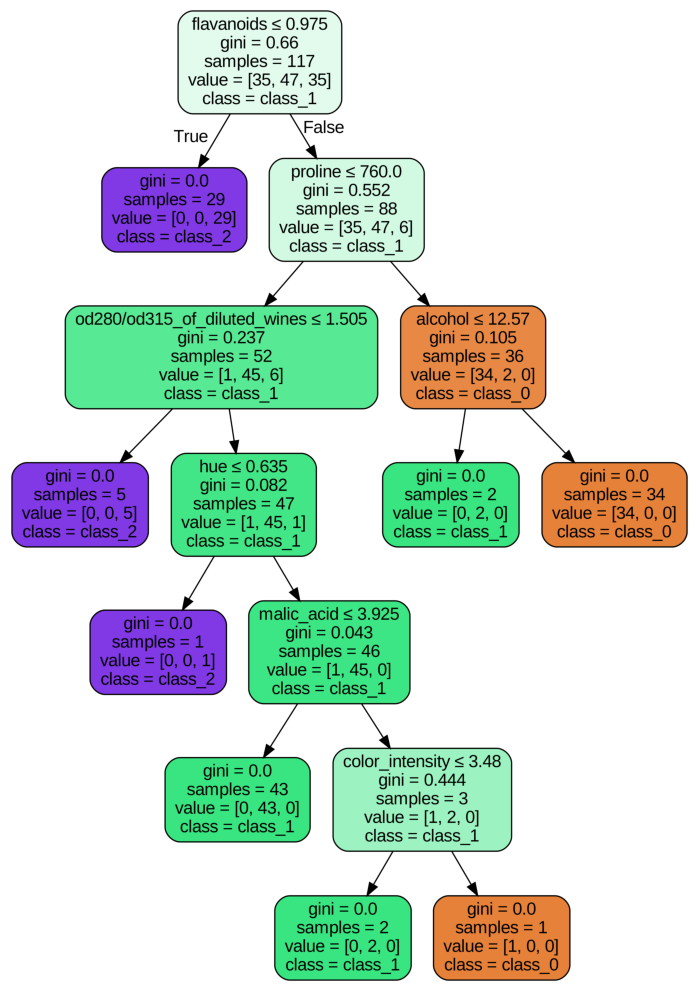

In [42]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();